# Codigo Auxiliar

In [16]:
import numpy as np

''' Ejercicio 1.1
tini: t inicial
tfin: t final
fm: frecuencia muestral
fs: frecuencia de la senial
fase: fase
'''
def senoidal(tini, tfin, fm, fs, fase):
    # periodo
    T = 1.0/fm
    # muestras
    t = np.arange(tini,tfin,T)
    # valores
    return [t, np.sin(2*np.pi*fs*t+fase)]

''' Ejercicio 1.2
tini: t inicial
tfin: t final
fm: frecuencia muestral
fs: frecuencia de la senial
fase: fase
'''
def sinc(tini, tfin, fm, fs, fase):
    T = 1.0/fm
    t = np.arange(tini,tfin,T)
    s = [0]*len(t)
    aux = 2*np.pi*fs
    for i in range(len(t)):
        s[i] = 1 if t[i]+fase == 0 else np.sin(aux*t[i]+fase)/(aux*t[i]+fase)
    return [t,s]

''' Ejercicio 1.3
tini: t inicial
tfin: t final
fm: frecuencia muestral
fs: frecuencia de la senial
fase: fase
'''
def cuadrada(tini, tfin, fm, fs, fase):
    T = 1.0/fm
    t = np.arange(tini, tfin, T)
    s = [0]*len(t)
    dospi = 2*np.pi
    aux = dospi*fs
    for i in range(len(t)):
        s[i] = -1 if np.mod(aux*t[i]+fase, dospi) >= np.pi else 1
    return [t,s]

# Guia 1
## Ejercicio 2
Realice las siguientes operaciones basicas sobre una señal senoidal:
1. inversion
2. rectificacion
3. cuatizacion en 8 niveles
Para la cuantización, tenga en cuenta la ecuación de cuatizador que aparece en el libro:
$$
\rho (t) =
\begin{cases}
    0           &\quad \text{si } x < 0,    \\
    Hint(x/H)   &\quad \text{si } 0 \leq x < (N-1)H, \\
    (N-1)H      &\quad \text{si } x \geq (N-1)H
\end{cases}
$$
donde $N$ es el número de niveles de la cuantización, y $H$ es la magnitud del cuanto o paso. La ecuación está diseñada para funcionar sólo sobre señales positivas, ya que elimina la parte negativa. Esto quiere decir que para la señal senoidal, que tiene parte negativa, el método debe adaptarse. Una forma sencilla de realiza ésto es hacer la señal toda positiva (restando el minimo), aplicar la formula anterior, y luego sumar el mínimo para volver a dejar la señal en el rango de valores original.

In [17]:
import numpy as np

''' Ejercicio 2.1
s: senial a invertir
'''
def invertir(s):
    # misma senial recorrida con paso -1
    return s[::-1]

''' Ejercicio 2.2
s: senial a rectificar
'''
def rectificar(s):
    # valores absolutos de la senial
    return np.abs(s)

''' Ejercio 2.3
s: senial a cuantizar
N: niveles de cuantizacion
'''
def cuantizar(s,N):
    # para N niveles, dividimos por N-1
    n=N-1
    # valor minimo de la senial original
    smin = min(s)
    # valor maximo de la senial DESPLAZADA
    smax = max(s) - smin

    if(smax == 0 or n <= 0):
        return s[:]

    # Magnitud del paso
    H = smax/n

    ''' retornar valores
    np.array( s, dtype=int): devuelve la senial s con la parte entera de sus valores
    [smin]*len(s): devuelve un arreglo con valores smin del mismo tamanio que s
    '''
    return H * np.array((s - [smin] * len(s))/H, dtype=int) + [smin] * len(s)

### Test

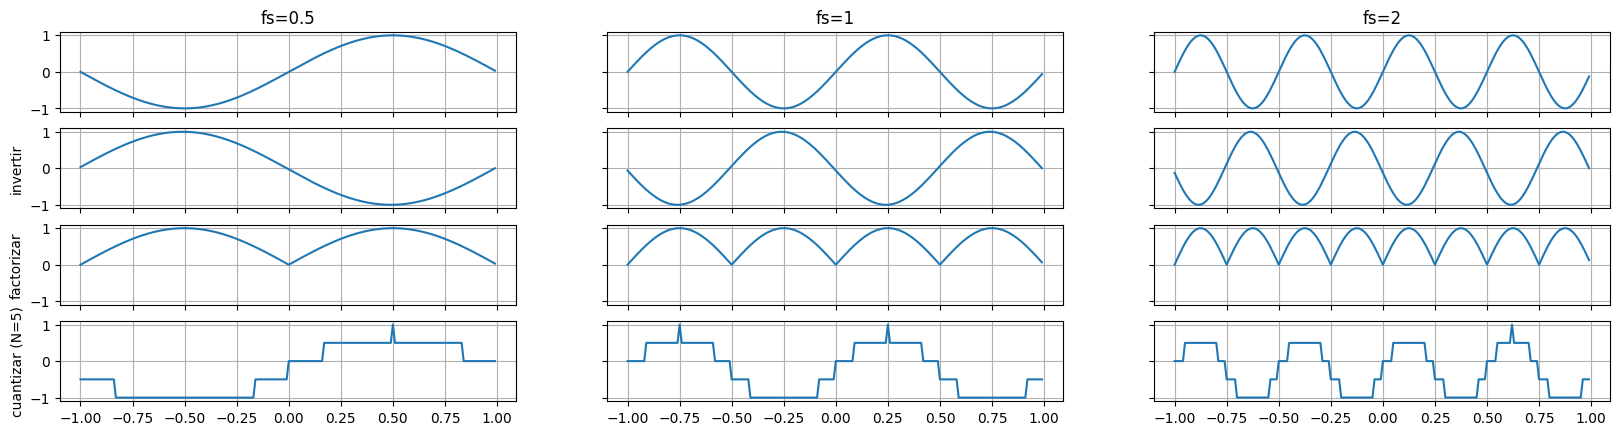

In [18]:
import matplotlib.pyplot as plt

s = [[0 for _ in range(3)] for _ in range(4)]
[t,s[0][0]] = senoidal(-1,1,100,0.5,0)
[t,s[0][1]] = senoidal(-1,1,100,1,0)
[t,s[0][2]] = senoidal(-1,1,100,2,0)

for i in range(3):
    s[1][i] = invertir(s[0][i])
    s[2][i] = rectificar(s[0][i])
    s[3][i] = cuantizar(s[0][i],5)

fig,ax = plt.subplots(4,3,sharex=True,sharey=True)
fig.set_figwidth(20)

for i in range(4):
    for j in range(3):
        ax[i,j].grid()
        ax[i,j].plot(t,s[i][j])

ax[0,0].set_title('fs=0.5')
ax[0,1].set_title('fs=1')
ax[0,2].set_title('fs=2')

ax[1,0].set_ylabel('invertir')
ax[2,0].set_ylabel('factorizar')
ax[3,0].set_ylabel('cuantizar (N=5)')

plt.show()